In [5]:
from fastai.tabular import *
import requests
import lxml.html as lh

In [6]:
path = Path('/home/jupyter/fpl-prediction/data')

In [7]:
season_paths = [path/'2016-17', path/'2017-18', path/'2018-19', path/'2019-20']
season_names = ['1617', '1718', '1819', '1920']
season_players = []

for season_path in season_paths:
    players = pd.read_csv(season_path/'players_raw.csv', 
                           usecols=['first_name', 'second_name', 'id', 'team_code', 'element_type'])
    season_players.append(players)
    
teams = pd.read_csv(path/'teams.csv')

# two danny wards in 1819, rename the new one
season_players[2].loc[143, 'second_name'] = 'Ward_2'

for players in season_players:
    players['full_name'] = players['first_name'] + '_' + players['second_name']
    players.drop(['first_name', 'second_name'], axis=1, inplace=True)
    
all_players = pd.concat(season_players, axis=0, ignore_index=True, sort=False)
all_players = pd.DataFrame(all_players['full_name'].drop_duplicates())

for players, season in zip(season_players, season_names):
    all_players = all_players.merge(players, on='full_name', how='left')
    all_players.rename(index=str,
                       columns={'id':'id_' + season,
                                'team_code':'team_' + season,
                                'element_type': 'position_' + season},
                       inplace=True)

In [8]:
all_players.head(20)

,full_name,position_1617,id_1617,team_1617,position_1718,id_1718,team_1718,position_1819,id_1819,team_1819,position_1920,id_1920,team_1920
0,David_Ospina,1.0,1.0,3.0,1.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
1,Petr_Cech,1.0,2.0,3.0,1.0,2.0,3.0,1.0,1.0,3.0,NaN,NaN,NaN
2,Laurent_Koscielny,2.0,3.0,3.0,2.0,4.0,3.0,2.0,3.0,3.0,2.0,7.0,3.0
3,Per_Mertesacker,2.0,4.0,3.0,2.0,5.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Gabriel Armando_de Abreu,2.0,5.0,3.0,2.0,6.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
5,Héctor_Bellerín,2.0,6.0,3.0,2.0,7.0,3.0,2.0,4.0,3.0,2.0,2.0,3.0
6,Kieran_Gibbs,2.0,7.0,3.0,2.0,8.0,35.0,NaN,NaN,NaN,NaN,NaN,NaN
7,Mathieu_Debuchy,2.0,8.0,3.0,2.0,564.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
8,Carl_Jenkinson,2.0,9.0,3.0,2.0,9.0,3.0,2.0,581.0,3.0,2.0,9.0,3.0
9,Nacho_Monreal,2.0,10.0,3.0,2.0,10.0,3.0,2.0,5.0,3.0,2.0,6.0,3.0


In [9]:
type(all_players.loc[:,'id_1617']) #& (all_players['full_name'] == '1')

pandas.core.series.Series

In [10]:
all_players.shape

(1139, 13)

In [11]:
teams

,team,team_code,team_1617,team_1718,team_1819,team_1920
0,Arsenal,3,1.0,1.0,1.0,1.0
1,Bournemouth,91,2.0,2.0,2.0,3.0
2,Burnley,90,3.0,4.0,4.0,5.0
3,Chelsea,8,4.0,5.0,6.0,6.0
4,Crystal Palace,31,5.0,6.0,7.0,7.0
5,Everton,11,6.0,7.0,8.0,8.0
6,Hull City,88,7.0,NaN,NaN,NaN
7,Leicester City,13,8.0,9.0,11.0,9.0
8,Liverpool,14,9.0,10.0,12.0,10.0
9,Manchester City,43,10.0,11.0,13.0,11.0


In [12]:
def build_season_mv(season, header_row, team_rows):
    
    #previous_season = str(int(season[2:4]) - 1)
    url=r'https://www.transfermarkt.com/premier-league/startseite/wettbewerb/GB1/plus/?saison_id=' + '20' + season[0:2]
    
    #Create a handle, page, to handle the contents of the website
    page = requests.get(url, headers={'User-Agent': 'Mozilla/5.0'})
    
    #Store the contents of the website under doc
    doc = lh.fromstring(page.content)
    
    #Parse data that are stored between <tr>..</tr> of HTML
    tr_elements = doc.xpath('//tr')
    
    #Create empty list
    col=[]
    i=0

    #For each row, store each first element (header) and an empty list
    for t in tr_elements[header_row]:
        i+=1
        name=t.text_content()
        col.append((name,[]))
        
    #data is stored on the second row onwards
    for j in team_rows:
        #T is our j'th row
        T=tr_elements[j]

        #If row is not of size 10, the //tr data is not from our table 
        if len(T)!=10:
            break

        #i is the index of our column
        i=0

        #Iterate through each element of the row
        for t in T.iterchildren():
            data=t.text_content() 
            #Check if row is empty
            if i>0:
            #Convert any numerical value to integers
                try:
                    data=int(data)
                except:
                    pass
            #Append the data to the empty list of the i'th column
            col[i][1].append(data)
            #Increment i for the next column
            i+=1
        
    Dict={title:column for (title,column) in col}
    df=pd.DataFrame(Dict)
    
    values = [float(item[0].replace(',', '.')) for item in df['Total MV'].str.split(" ", 1)]
    values = [item*10**3 if item < 3 else item for item in values]
    values = values/np.mean(values)
    
    df = df[['name']]
    df.replace(team_names, inplace=True)
    df['relative_market_value'] = values
    df['season'] = season
    
    return df

In [13]:
team_names = {'Man City': 'Manchester City',
              'Spurs': 'Tottenham Hotspur',
              'Man Utd': 'Manchester United',
              'Leicester': 'Leicester City',
              'West Ham': 'West Ham United',
              'Wolves': 'Wolverhampton Wanderers',
              'Brighton': 'Brighton and Hove Albion',
              'Newcastle': 'Newcastle United',
              'Sheffield Utd.': 'Sheffield United',
              'West Brom': 'West Bromwich Albion',
              'Swansea': 'Swansea City',
              'Huddersfield': 'Huddersfield Town',
              'Cardiff': 'Cardiff City'}

In [14]:
teams_mv = pd.concat([build_season_mv('1617', 10, range(12,32)),
                      build_season_mv('1718', 10, range(12,32)),
                      build_season_mv('1819', 10, range(12,32)),
                      build_season_mv('1920', 11, range(13,33))], axis=0, ignore_index=True, sort=False)

In [15]:
teams_mv[teams_mv['season'] == '1819']

,name,relative_market_value,season
40,Manchester City,2.540586,1819
41,Chelsea,2.540586,1819
42,Liverpool,2.177887,1819
43,Manchester United,2.015531,1819
44,Tottenham Hotspur,1.983109,1819
45,Arsenal,1.435552,1819
46,Everton,1.039221,1819
47,Leicester City,0.796050,1819
48,West Ham United,0.749352,1819
49,Southampton,0.654624,1819


In [16]:
def build_season(path, season):
    df_season = []
    id_season = 'id_' + season
    id_team = 'team_' + season
    id_position = 'position_' + season
    
    for i in range(1, 39):
        gw = 'gws/gw' + str(i) + '.csv'
        gw_df = pd.read_csv(path/gw, encoding='latin')
        gw_df['gw'] = i
        df_season.append(gw_df)
    
    df_season = pd.concat(df_season, axis=0)
    df_season = df_season.merge(all_players, left_on='element', right_on=id_season, how='left')
    df_season = df_season.merge(teams, left_on='opponent_team', right_on=id_team, how='left')
    df_season = df_season.merge(teams, left_on=id_team + '_x', right_on='team_code', how='left')
    df_season = df_season.merge(teams_mv[teams_mv['season'] == season], left_on='team_y', right_on='name', how='left')
    df_season = df_season[['full_name', 'gw', 
                           id_position, 'minutes', 'team_y', 
                           'team_x', 'relative_market_value', 'was_home', 'total_points']]
    df_season.columns = ['player', 'gw', 
                          'position', 'minutes', 'team', 
                          'opponent_team', 'relative_market_value', 'was_home', 'total_points']
    df_season['season'] = season
    df_season['position'] = df_season['position'].astype(int)
    
    return df_season

In [17]:
df_1617 = build_season(season_paths[0], season_names[0])
df_1718 = build_season(season_paths[1], season_names[1])
df_1819 = build_season(season_paths[2], season_names[2])

In [18]:
type(df_1617['minutes'])

pandas.core.series.Series

In [19]:
[x.shape for x in [df_1617, df_1718, df_1819]]

[(23679, 10), (22467, 10), (21790, 10)]

In [20]:
#df_all = pd.concat([df_1617, df_1718, df_1819], ignore_index=True, axis=0)

In [21]:
df_all = df_1617.append(df_1718).append(df_1819).reset_index(drop=True)

In [22]:
len(df_all)

67936

In [23]:
df_all.tail(10)

,player,gw,position,minutes,team,opponent_team,relative_market_value,was_home,total_points,season
67926,Yerry_Mina,38,2,90,Everton,Tottenham Hotspur,1.039221,False,1,1819
67927,Yohan_Benalouane,38,2,0,Leicester City,Chelsea,0.796050,True,0,1819
67928,Yoshinori_Muto,38,4,24,Newcastle United,Fulham,0.483921,False,1,1819
67929,Younes_Kaboul,38,2,0,Watford,West Ham United,0.412301,True,0,1819
67930,Youri_Tielemans,38,3,90,Leicester City,Chelsea,0.796050,True,3,1819
67931,Yves_Bissouma,38,3,90,Brighton and Hove Albion,Manchester City,0.417745,True,2,1819
67932,Zech_Medley,38,2,0,Arsenal,Burnley,1.435552,False,0,1819
67933,Zeze Steven_Sessegnon,38,2,0,Fulham,Newcastle United,0.405284,True,0,1819
67934,Álvaro_Morata,38,4,0,Chelsea,Leicester City,2.540586,False,0,1819
67935,Çaglar_Söyüncü,38,2,0,Leicester City,Chelsea,0.796050,True,0,1819


In [24]:
# find validation cut point - index for 18-19 season second half (gw 19)
valid_start = df_all[(df_all['gw'] > 18) & (df_all['season'] == '1819')].index.min()
#valid_start = df_all[(df_all['season'] == '1819')].index.min()
valid_end = df_all.index.max()

In [25]:
df_all.shape

(67936, 10)

In [26]:
df_all.dtypes

player                    object
gw                         int64
position                   int64
minutes                    int64
team                      object
opponent_team             object
relative_market_value    float64
was_home                    bool
total_points               int64
season                    object
dtype: object

In [63]:
cat_vars = ['player', 'gw', 'position', 'team', 'opponent_team', 'was_home', 'season']
cont_vars = ['minutes']
#cont_vars = ['relative_market_value', 'minutes']

In [64]:
dep_var = 'total_points'

In [65]:
valid_idx = range(valid_start, valid_end)

In [66]:
procs=[Categorify, Normalize]

In [67]:
data = (TabularList.from_df(df_all, path=path, cat_names=cat_vars, cont_names=cont_vars, procs=procs,)
                .split_by_idx(valid_idx)
                .label_from_df(cols=dep_var, label_cls=FloatList)
                .databunch())

In [68]:
max_y = np.max(df_all['total_points'])*1.1
y_range = torch.tensor([0, max_y], device=defaults.device)

In [43]:
learn = tabular_learner(data, layers=[1000,500], ps=[0.001,0.01], emb_drop=0.04, 
                        y_range=y_range, metrics=rmse)

In [44]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(1055, 79)
    (1): Embedding(39, 12)
    (2): Embedding(5, 4)
    (3): Embedding(27, 10)
    (4): Embedding(27, 10)
    (5): Embedding(3, 3)
    (6): Embedding(4, 3)
  )
  (emb_drop): Dropout(p=0.04)
  (bn_cont): BatchNorm1d(2, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=123, out_features=1000, bias=True)
    (1): ReLU(inplace)
    (2): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.001)
    (4): Linear(in_features=1000, out_features=500, bias=True)
    (5): ReLU(inplace)
    (6): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.01)
    (8): Linear(in_features=500, out_features=1, bias=True)
  )
)

In [45]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


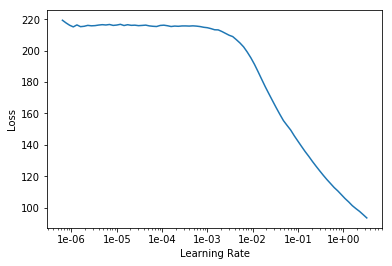

In [46]:
learn.recorder.plot()

In [122]:
# no market value, second half of season validation 
learn.fit_one_cycle(7, 1.1e-2, wd=0.2)

epoch,train_loss,valid_loss,root_mean_squared_error,time
0,4.671103,4.058165,1.975258,00:05
1,4.023581,4.245531,1.991781,00:05
2,4.069503,4.208030,1.985547,00:05
3,3.735965,4.595274,2.119409,00:05
4,3.585393,3.877654,1.932921,00:05
5,3.206583,3.711629,1.876884,00:06
6,3.050195,3.812535,1.910187,00:05


In [47]:
# market value, second half of season validation 
learn.fit_one_cycle(7, 1e-2, wd=0.2)

epoch,train_loss,valid_loss,root_mean_squared_error,time
0,4.151288,3.751769,1.886404,00:06
1,3.706448,3.899445,1.936416,00:06
2,3.418671,3.762981,1.883483,00:06
3,3.615507,3.675845,1.863552,00:06
4,3.360439,3.624856,1.859370,00:06
5,3.515946,3.514691,1.824200,00:06
6,3.037314,3.540320,1.828722,00:06


In [97]:
# no market value, new season validation
learn.fit_one_cycle(7, 1.1e-2, wd=0.2)

epoch,train_loss,valid_loss,root_mean_squared_error,time
0,4.190550,6.135087,2.440161,00:05
1,3.857543,3.978027,1.933421,00:05
2,3.710502,3.876259,1.927505,00:05
3,3.443164,3.826964,1.915945,00:05
4,3.446122,3.713155,1.877538,00:05
5,3.098882,3.761742,1.897482,00:05
6,2.939469,3.802439,1.905856,00:05


In [105]:
# market value, new season validation
learn.fit_one_cycle(7, 1.1e-2, wd=0.2)

epoch,train_loss,valid_loss,root_mean_squared_error,time
0,3.974407,3.883185,1.914001,00:05
1,3.753403,4.662024,2.126512,00:05
2,3.625479,3.772259,1.889259,00:05
3,3.840882,3.775510,1.897972,00:05
4,3.616885,3.812484,1.901750,00:05
5,3.309392,3.734806,1.886369,00:05
6,2.903124,3.771559,1.897273,00:05


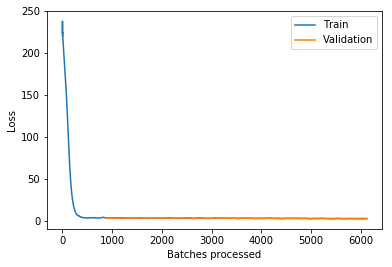

In [48]:
learn.recorder.plot_losses()

In [49]:
learn.get_preds()[0]

tensor([[2.3285],
        [0.1663],
        [0.2299],
        ...,
        [0.1484],
        [0.1373],
        [0.2233]])

In [50]:
df_valid = df_all.loc[valid_idx]
df_valid['predicted_points'] = learn.get_preds()[0].data.numpy().T[0]

In [51]:
df_valid.dtypes

player                    object
gw                         int64
position                   int64
minutes                    int64
team                      object
opponent_team             object
relative_market_value    float64
was_home                    bool
total_points               int64
season                    object
predicted_points         float32
dtype: object

In [52]:
df_valid[(df_valid['team'] == 'Cardiff City') & (df_valid['opponent_team'] == 'Chelsea')]

,player,gw,position,minutes,team,opponent_team,relative_market_value,was_home,total_points,season,predicted_points
63316,Alex_Smithies,32,1,0,Cardiff City,Chelsea,0.18389,True,0,1819,0.083272
63354,Anthony_Pilkington,32,3,0,Cardiff City,Chelsea,0.18389,True,0,1819,0.097365
63363,Aron_Gunnarsson,32,3,90,Cardiff City,Chelsea,0.18389,True,1,1819,2.569855
63367,Ashley Darel Jazz_Richards,32,2,0,Cardiff City,Chelsea,0.18389,True,0,1819,0.135844
63408,Bobby_Reid,32,4,0,Cardiff City,Chelsea,0.18389,True,0,1819,0.393432
63414,Brian_Murphy,32,1,0,Cardiff City,Chelsea,0.18389,True,0,1819,0.126474
63418,Bruno_Ecuele Manga,32,2,90,Cardiff City,Chelsea,0.18389,True,1,1819,1.241493
63425,Callum_Paterson,32,3,0,Cardiff City,Chelsea,0.18389,True,0,1819,0.242164
63493,Danny_Ward_2,32,3,0,Cardiff City,Chelsea,0.18389,True,0,1819,0.276097
63503,David Junior_Hoilett,32,3,90,Cardiff City,Chelsea,0.18389,True,2,1819,3.218996


In [53]:
fixtures = pd.read_csv(path/'fixtures.csv')


In [54]:
fixtures.head(10)

,home_team,away_team,gw
0,Liverpool,Norwich,1
1,West Ham United,Manchester City,1
2,Bournemouth,Sheffield United,1
3,Burnley,Southampton,1
4,Crystal Palace,Everton,1
5,Watford,Brighton and Hove Albion,1
6,Tottenham Hotspur,Aston Villa,1
7,Leicester City,Wolverhampton Wanderers,1
8,Newcastle United,Arsenal,1
9,Manchester United,Chelsea,1


In [55]:
fixtures = fixtures.merge(teams, left_on='home_team', right_on='team', how='left')
fixtures = fixtures.merge(teams, left_on='away_team', right_on='team', how='left')
fixtures = fixtures[['gw', 'home_team', 'away_team', 'team_code_x', 'team_code_y']]
fixtures.rename(index=str,
                columns={'team_code_x':'home_team_code',
                         'team_code_y':'away_team_code'},
                inplace=True)

In [56]:
fixtures

,gw,home_team,away_team,home_team_code,away_team_code
0,1,Liverpool,Norwich,14,45
1,1,West Ham United,Manchester City,21,43
2,1,Bournemouth,Sheffield United,91,49
3,1,Burnley,Southampton,90,20
4,1,Crystal Palace,Everton,31,11
5,1,Watford,Brighton and Hove Albion,57,36
6,1,Tottenham Hotspur,Aston Villa,6,7
7,1,Leicester City,Wolverhampton Wanderers,13,39
8,1,Newcastle United,Arsenal,4,3
9,1,Manchester United,Chelsea,1,8


In [57]:
home_df = fixtures.merge(all_players, 
               left_on='home_team_code', 
               right_on='team_1920', 
               how='left')

home_df = home_df[['gw', 'home_team', 'away_team', 'full_name', 'position_1920']]
home_df.rename(index=str, 
               columns={'home_team':'team',
                        'away_team':'opponent_team',
                        'full_name':'player',
                        'position_1920':'position'},
              inplace=True)
home_df['was_home'] = True
home_df['season'] = '1920'
home_df['minutes'] = 90
home_df['position'] = home_df['position'].astype(int)

In [58]:
away_df = fixtures.merge(all_players, 
               left_on='away_team_code', 
               right_on='team_1920', 
               how='left')

away_df = away_df[['gw',  'away_team', 'home_team', 'full_name', 'position_1920']]
away_df.rename(index=str, 
               columns={'away_team':'team',
                        'home_team':'opponent_team',
                        'full_name':'player',
                        'position_1920':'position'},
              inplace=True)
away_df['was_home'] = False
away_df['season'] = '1920'
away_df['minutes'] = 90
away_df['position'] = away_df['position'].astype(int)

In [59]:
away_df.head()

,gw,team,opponent_team,player,position,was_home,season,minutes
0,1,Norwich,Liverpool,Tim_Krul,1,False,1920,90
1,1,Norwich,Liverpool,Grant_Hanley,2,False,1920,90
2,1,Norwich,Liverpool,Timm_Klose,2,False,1920,90
3,1,Norwich,Liverpool,Ben_Godfrey,2,False,1920,90
4,1,Norwich,Liverpool,Maximillian_Aarons,2,False,1920,90


In [60]:
home_df.head()

,gw,team,opponent_team,player,position,was_home,season,minutes
0,1,Liverpool,Norwich,Alex_Oxlade-Chamberlain,3,True,1920,90
1,1,Liverpool,Norwich,Andrew_Robertson,2,True,1920,90
2,1,Liverpool,Norwich,Simon_Mignolet,1,True,1920,90
3,1,Liverpool,Norwich,Dejan_Lovren,2,True,1920,90
4,1,Liverpool,Norwich,Joseph_Gomez,2,True,1920,90


In [61]:
test_df = home_df.append(away_df).reset_index(drop=True)

In [62]:
test_df.head()

,gw,team,opponent_team,player,position,was_home,season,minutes
0,1,Liverpool,Norwich,Alex_Oxlade-Chamberlain,3,True,1920,90
1,1,Liverpool,Norwich,Andrew_Robertson,2,True,1920,90
2,1,Liverpool,Norwich,Simon_Mignolet,1,True,1920,90
3,1,Liverpool,Norwich,Dejan_Lovren,2,True,1920,90
4,1,Liverpool,Norwich,Joseph_Gomez,2,True,1920,90


In [69]:
data = (TabularList.from_df(df_all, path=path, cat_names=cat_vars, cont_names=cont_vars, procs=procs,)
                .split_by_idx(valid_idx)
                .label_from_df(cols=dep_var, label_cls=FloatList)
                .add_test(TabularList.from_df(test_df, path=path, cat_names=cat_vars, cont_names=cont_vars))
                .databunch())

In [70]:
learn = tabular_learner(data, layers=[1000,500], ps=[0.001,0.01], emb_drop=0.04, 
                        y_range=y_range, metrics=rmse)

In [71]:
learn.fit_one_cycle(7, 1.1e-2, wd=0.2)

epoch,train_loss,valid_loss,root_mean_squared_error,time
0,3.873379,3.676985,1.858472,00:06
1,3.755515,3.837305,1.897594,00:06
2,4.090179,3.676453,1.864273,00:06
3,3.757142,3.639186,1.851940,00:06
4,3.495227,3.653770,1.866254,00:06
5,3.345268,3.497428,1.815456,00:06
6,3.394720,3.535948,1.829201,00:06


In [72]:
test_preds=learn.get_preds(DatasetType.Test)
test_df['predicted_points'] = test_preds[0].data.numpy().T[0]

In [73]:
test_df.shape

(16074, 9)

In [74]:
test_df.head(20)
#.sort_values(by='predicted_points', ascending=False)

,gw,team,opponent_team,player,position,was_home,season,minutes,predicted_points
0,1,Liverpool,Norwich,Alex_Oxlade-Chamberlain,3,True,1920,90,4.467064
1,1,Liverpool,Norwich,Andrew_Robertson,2,True,1920,90,6.281201
2,1,Liverpool,Norwich,Simon_Mignolet,1,True,1920,90,4.100839
3,1,Liverpool,Norwich,Dejan_Lovren,2,True,1920,90,5.055418
4,1,Liverpool,Norwich,Joseph_Gomez,2,True,1920,90,5.395176
5,1,Liverpool,Norwich,Joel_Matip,2,True,1920,90,4.727139
6,1,Liverpool,Norwich,Jordan_Henderson,3,True,1920,90,2.874447
7,1,Liverpool,Norwich,Adam_Lallana,3,True,1920,90,4.743069
8,1,Liverpool,Norwich,James_Milner,3,True,1920,90,4.484894
9,1,Liverpool,Norwich,Roberto_Firmino,4,True,1920,90,5.813509


In [75]:
test_df.to_csv('predictions.csv', encoding='latin')